<a href="https://colab.research.google.com/github/jyoti-kumbhar/Data-Science/blob/main/prac7A_logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical No. 7A


*   Aim: Logistic Regression and Decision Tree
1. Build a logistic regression model to predict a binary outcome.
2. Evaluate the model's performance using classification metrics (e.g., accuracy,
precision, recall).
3. Construct a decision tree model and interpret the decision rules for classification.
*   T091 Jyoti Kumbhar



In [2]:
import pandas as pd
df = pd.read_csv("/content/Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,97.0


In [29]:
df["target"] = (df["CLASIFFICATION_FINAL"] <= 3).astype(int)
X = df.drop(["CLASIFFICATION_FINAL", "target"], axis=1).select_dtypes(include='number')
y = df["target"]

In [30]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Predicted Test Results : ",y_pred)
print("~"*20)

Predicted Test Results :  [1 1 1 ... 1 1 1]
~~~~~~~~~~~~~~~~~~~~


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  739,  4950],
       [  693, 31953]])

Text(0.5, 427.9555555555555, 'Predicted label')

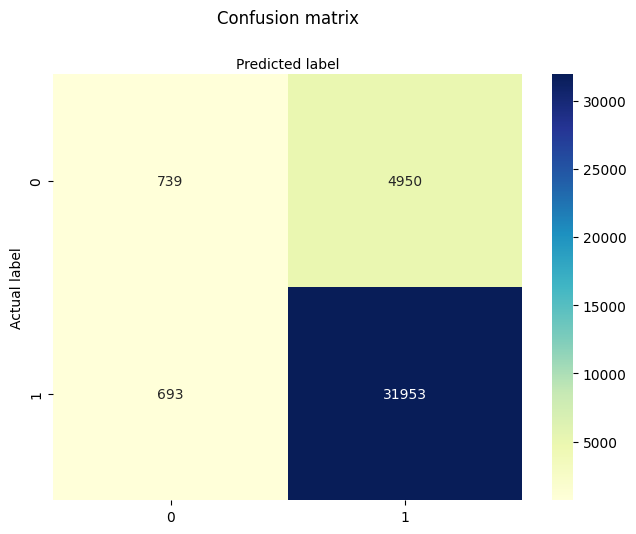

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = ['COVID Negative', 'COVID Positive']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8527977044476327
Precision: 0.813952997391794
Recall: 0.8527977044476327
F1-Score: 0.8133032805495937


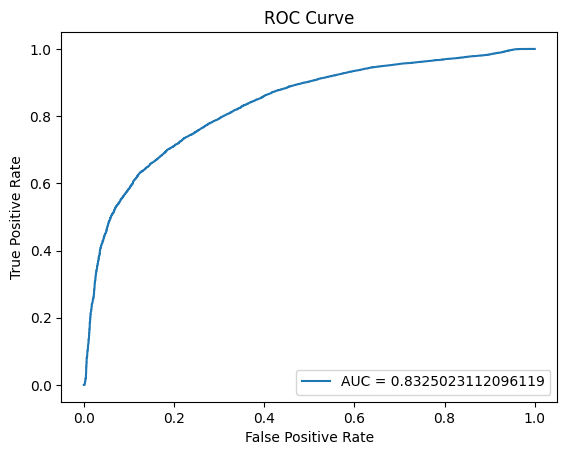

In [36]:
# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()